- TITLE: 
- AUTHOR: John Kitchin




# ASSIGNED Levenspiel 2

The following Levenspiel data is available for a reaction run in an packed bed reactor with an inlet molar flow of 2 mol A/s.



In [1]:
import numpy as np

X = np.array([0, 0.2, 0.4, 0.6, 0.8, 0.9])

# This is Fa0 / -ra
Fra = np.array([60, 30, 19, 20, 27, 42]) # the units of this quantity are (kg)


# Part 1

What arrangement of reactors is required to get 85% conversion with the smallest overall catalyst weight? Calculate the weight in each reactor. Note that weight and reactor volume are related by the bulk density of the catalyst.




# Part 2

Show graphically in a Levenspiel plot how the reactors are arranged by shading the area represented by each reactor.




# Solution

You should first plot the data to see what it looks like.



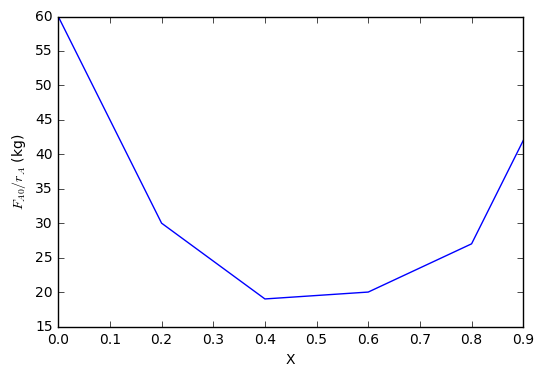

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, Fra)
plt.xlabel('X')
plt.ylabel('$F_{A0}/r_A$ (kg)')

From the graph you can see that a CSTR up to X=0.4 followed by a PBR up to X=0.85 is would give the lowest area, and thus lowest weight of catalyst.

For the CSTR, the weight is equal to the product of the conversion and Fra at X=0.4.



In [1]:
CSTR_weight = X[2] * Fra[2]
print('The catalyst weight in the CSTR is {:1.2f} kg.'.format(CSTR_weight))

The catalyst weight in the CSTR is 7.60 kg.

For the PFR, we need to integrate the data from X=0.4 to X=0.85. We do not have a data point at X=0.85, so we need to use interpolation.



In [1]:
from scipy.interpolate import interp1d
from scipy.integrate import quad

f = interp1d(X, Fra)

pbr_weight, _ = quad(f, 0.4, 0.85)
print('The PBR catalyst weight is {:1.2f} kg'.format(pbr_weight))

The PBR catalyst weight is 10.14 kg

To show these results graphically, we use the fill\_between function.



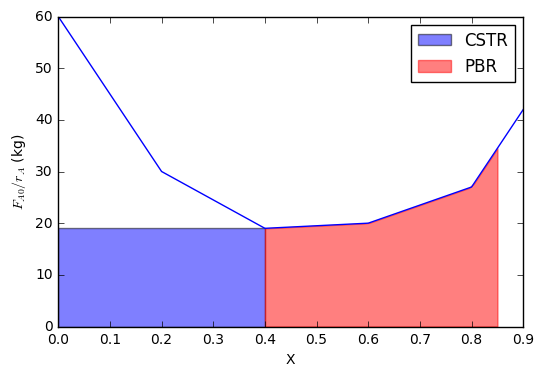

In [1]:
plt.plot(X, Fra)
plt.fill_between([0, X[2]], [Fra[2], Fra[2]], alpha=0.5, label='CSTR')

Xf = np.linspace(0.4, 0.85)
Fraf = f(Xf)

plt.fill_between(Xf, Fraf, color='r', alpha=0.5, label='PBR')
plt.xlabel('X')
plt.ylabel('$F_{A0}/r_A$ (kg)')
plt.legend(loc='best')